Train dataset:
                                                text  label
0  $BYND - JPMorgan reels in expectations on Beyo...      0
1  $CCL $RCL - Nomura points to bookings weakness...      0
2  $CX - Cemex cut at Credit Suisse, J.P. Morgan ...      0
3  $ESS: BTIG Research cuts to Neutral https://t....      0
4  $FNKO - Funko slides after Piper Jaffray PT cu...      0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9543 entries, 0 to 9542
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    9543 non-null   object
 1   label   9543 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 149.2+ KB
None
Valid dataset:
                                                text  label
0  $ALLY - Ally Financial pulls outlook https://t...      0
1  $DELL $HPE - Dell, HPE targets trimmed on comp...      0
2  $PRTY - Moody's turns negative on Party City h...      0
3                   $SAN: Deutsche Bank cuts to Hold      0
4  

/Users/carlosillanaldariz/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
299/299 - 25s - 83ms/step - accuracy: 0.7096 - loss: 0.7089 - val_accuracy: 0.7358 - val_loss: 0.6194
Epoch 2/3
299/299 - 27s - 90ms/step - accuracy: 0.7970 - loss: 0.4931 - val_accuracy: 0.8070 - val_loss: 0.5219
Epoch 3/3
299/299 - 27s - 91ms/step - accuracy: 0.8815 - loss: 0.3253 - val_accuracy: 0.8036 - val_loss: 0.5225


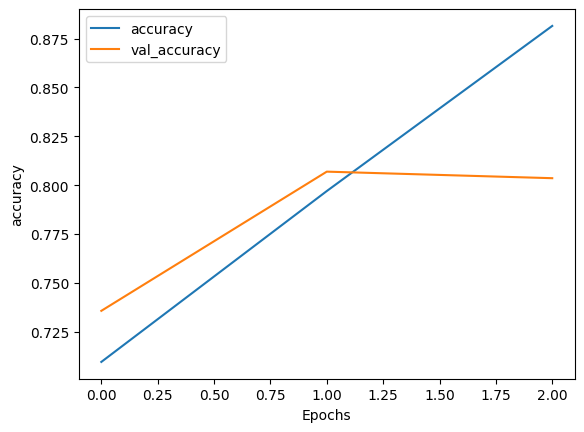

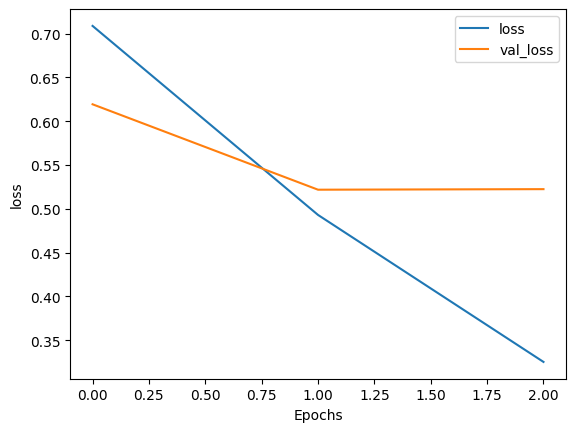

75/75 - 2s - 22ms/step - accuracy: 0.8036 - loss: 0.5225
Validation Accuracy: 80.36%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Tweet: "The stock market is crashing today!" -> Sentiment: Bullish
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Tweet: "$AAPL is on fire! 📈 Huge earnings report and strong guidance. Time to buy! 🚀🚀" -> Sentiment: Bullish
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Tweet: "$TSLA is crashing hard after disappointing delivery numbers. Expect more downside. 📉😬" -> Sentiment: Bearish


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Cargar los datos de entrenamiento y validación
train_file = 'sent_train.csv'
valid_file = 'sent_valid.csv'

df_train = pd.read_csv(train_file)
df_valid = pd.read_csv(valid_file)

# Mostrar información sobre los datos
print("Train dataset:")
print(df_train.head())
print(df_train.info())
print("Valid dataset:")
print(df_valid.head())
print(df_valid.info())

# Diccionario de etiquetas
sentiments = {
    "LABEL_0": "Bearish", 
    "LABEL_1": "Bullish", 
    "LABEL_2": "Neutral"
}

# Convertir etiquetas de texto a números
label_encoder = LabelEncoder()
df_train['label_encoded'] = label_encoder.fit_transform(df_train['label'])
df_valid['label_encoded'] = label_encoder.transform(df_valid['label'])

# Tokenización de los tweets
vocab_size = 5000  # Tamaño del vocabulario
embedding_dim = 64  # Dimensión de los vectores de embeddings
max_length = 200  # Longitud máxima de las secuencias
trunc_type = 'post'  # Truncar las secuencias por el final
padding_type = 'post'  # Rellenar las secuencias por el final
oov_tok = '<OOV>'  # Token para palabras desconocidas

# Crear el tokenizador y ajustar el texto de entrenamiento
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(df_train['text'])

# Convertir tweets a secuencias numéricas
train_sequences = tokenizer.texts_to_sequences(df_train['text'])
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

valid_sequences = tokenizer.texts_to_sequences(df_valid['text'])
valid_padded = pad_sequences(valid_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convertir etiquetas a numpy arrays
train_labels = np.array(df_train['label_encoded'])
valid_labels = np.array(df_valid['label_encoded'])

# Construcción del modelo LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 categorías de sentimientos
])

# Compilar el modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Mostrar resumen del modelo
model.summary()

# Entrenar el modelo
num_epochs = 3
history = model.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(valid_padded, valid_labels), verbose=2)

# Función para graficar precisión y pérdida
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_' + string])
    plt.show()

# Graficar los resultados de entrenamiento y validación
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# Evaluación del modelo en el conjunto de validación
loss, accuracy = model.evaluate(valid_padded, valid_labels, verbose=2)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

# Prueba con un tweet nuevo
def predict_sentiment(tweet):
    sequence = tokenizer.texts_to_sequences([tweet])
    padded = pad_sequences(sequence, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    prediction = model.predict(padded)
    label_index = np.argmax(prediction)
    return sentiments[f'LABEL_{label_index}']

# Ejemplo de predicción
example_tweet = "The stock market is crashing today!"
print(f'Tweet: "{example_tweet}" -> Sentiment: {predict_sentiment(example_tweet)}')

# Example 1: Bullish tweet
example_tweet_1 = "$AAPL is on fire! 📈 Huge earnings report and strong guidance. Time to buy! 🚀🚀"
print(f'Tweet: "{example_tweet_1}" -> Sentiment: {predict_sentiment(example_tweet_1)}')

# Example 2: Bearish tweet
example_tweet_2 = "$TSLA is crashing hard after disappointing delivery numbers. Expect more downside. 📉😬"
print(f'Tweet: "{example_tweet_2}" -> Sentiment: {predict_sentiment(example_tweet_2)}')
